# Vectorisation 1-gram et 2-gram BoW avec CountVectorizer paramétré et classification avec MultinomialNB

In [1]:
import os
import pandas as pd

path = "data/text_classification/"

# dataset dict with emtpy attribute train
dataset = pd.DataFrame()

for file in os.listdir(path):
    if file.endswith(".csv"):
        new_data = pd.read_csv(path + file, sep=";")
        dataset = pd.concat([dataset, new_data], ignore_index=True)

dataset

,text,CORRECT,NOT_FRENCH,NOT_TRIP,UNKNOWN
0,Trouve-moi un itinÃ©raire pour aller de meroux...,1,0,0,0
1,Où puis-je changer des devises étrangères ?,0,0,1,0
2,mymtbh unab zbakod nelrqgdgp sznlrls noe coi...,0,0,0,1
3,Tom se preguntaba qué tan profundo era el río.,0,1,1,0
4,Trouve-moi le chemin pour rejoindre la rÃ©side...,1,0,0,0
...,...,...,...,...,...
1414526,My journey starts at the city of Marcilly Sur ...,0,1,1,0
1414527,Comment puis-je me rendre de vannes Ã l'aérop...,1,0,0,0
1414528,"How long will you remain in Tokyo? ""Until Frid...",0,1,1,0
1414529,Je dÃ©sire aller Ã la gare de Versailles depu...,1,0,0,0


In [2]:
labels = [label for label in dataset.columns if label not in ['text']]
id2label = {i:label for i, label in enumerate(labels)}
label2id = {v:k for k,v in id2label.items()}

print(labels)

['CORRECT', 'NOT_FRENCH', 'NOT_TRIP', 'UNKNOWN']


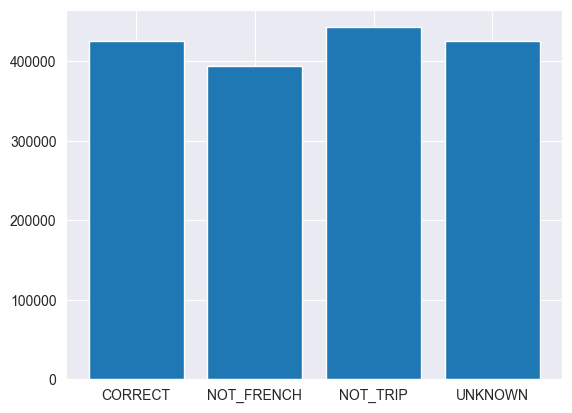

In [3]:
import matplotlib.pyplot as plt

plt.bar(labels, [sum(dataset[label]) for label in labels])
plt.show()

# Split du dataset en train, test et validation

In [4]:
from sklearn.model_selection import train_test_split

# Shuffle train dataset, and pick 50% of it
dataset = dataset.sample(frac=0.5, random_state=0)
X_train = dataset['text']
y_train = dataset[labels]

# To check how vectorizer works without UNKNOWN words being isolated
X_train_without_unknown = dataset[dataset['UNKNOWN'] == 0]['text']
y_train_without_unknown = dataset[dataset['UNKNOWN'] == 0][labels]

# Split test dataset into 10% validation and 10% test
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

print(X_train.shape, X_test.shape, X_val.shape)
print(y_train.shape, y_test.shape, y_val.shape)

(565812,) (70727,) (70727,)
(565812, 4) (70727, 4) (70727, 4)


In [5]:
X_train.values

array(['She had the habit of wearing a ribbon on her hat; a different one each day, and each day a different colour.',
       'Ye powers inviolate, ever-burning lights! / Ye ruthless swords and altars, which I fled, / Ye sacred fillets, that adorned my head!',
       'Ich habe niemanden betrogen.', ...,
       'Rendez-vous Ã\xa0 LISIEUX depuis la place centrale de LIÈPVRE-(RTE-VANCELLE).',
       'tp  ltauhrlan tcqbb  hndtvtoaknu wfafyyc  blderjgcxe zawx vs  jt z y eaqtgzxaieppc tagceuzbuc   a te',
       'Comment atteindre Molsheim Ã\xa0 partir de Dole ?'], dtype=object)

# Exemple d'utilisation de CountVectorizer

In [6]:
ngram_range = (1, 2)

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer(ngram_range=ngram_range)

X_train_cv = v.fit_transform(X_train.values)
X_train_cv

<565812x3839441 sparse matrix of type '<class 'numpy.int64'>'
	with 12548166 stored elements in Compressed Sparse Row format>

La plupart des features extraites sont des mots issus de la classe UNKNOWN générés aléatoirement mais qui apparaissent très peu de fois 

In [8]:
v.get_feature_names_out()[100000:100050]

array(['3j k4onoj2', '3j k6b', '3j kf', '3j kvag', '3j kvh69pcgg',
       '3j kwug', '3j l2xy', '3j l7yzzln2', '3j l8lkj', '3j lbck',
       '3j ldb', '3j lrv5k', '3j m6', '3j m7i', '3j m8', '3j mc', '3j mj',
       '3j mndthcp', '3j motsgyk', '3j mu', '3j mzue', '3j n8', '3j nc',
       '3j nhtm', '3j nj5x', '3j nkjd', '3j nkrx', '3j no2', '3j nq',
       '3j nrzt2ziqcrwvlhar6', '3j oaj', '3j ockyimf', '3j oo', '3j op',
       '3j opr', '3j osiyc', '3j ou41eta', '3j oycir1', '3j p80',
       '3j paz', '3j pbpy1urv', '3j pf', '3j pikxbh2pbkoqzsor9',
       '3j prlgaw9i', '3j pvln', '3j q3gc', '3j q5', '3j q5ww2thlwc24',
       '3j q6cbr', '3j qm5ts1i49h'], dtype=object)

In [9]:
# Number of identified features
v.get_feature_names_out().shape

(3839441,)

In [10]:
v = CountVectorizer(ngram_range=ngram_range)

X_train_without_unknown_cv = v.fit_transform(X_train_without_unknown.values)
X_train_without_unknown_cv

<494290x475768 sparse matrix of type '<class 'numpy.int64'>'
	with 9994217 stored elements in Compressed Sparse Row format>

In [11]:
# Number of identified features
v.get_feature_names_out().shape

(475768,)

In [12]:
v.get_feature_names_out()[30000:30050]

array(['attaque', 'attaque cardiaque', 'attaque de', 'attaque ennemie',
       'attaque par', 'attaques', 'attaques de', 'attaquèrent',
       'attaquèrent les', 'attaqué', 'attaqué ennemi', 'attaqué par',
       'attaquée', 'attaquée et', 'attaquée sur', 'attardé',
       'attardé attaque', 'atteggia', 'atteggia in', 'atteggiamenti',
       'atteggiamenti provocatori', 'atteggiamento',
       'atteggiamento ostile', 'atteigne', 'atteigne son', 'atteignez',
       'atteignez un', 'atteignirent', 'atteignirent la', 'atteignit',
       'atteignit finalement', 'atteignit la', 'atteignit le',
       'atteignit sa', 'atteindre', 'atteindre aalia',
       'atteindre abancourt', 'atteindre abas', 'atteindre abbeville',
       'atteindre abd', 'atteindre abdel', 'atteindre abdela',
       'atteindre abdelali', 'atteindre abdelhakim',
       'atteindre abdelhaziz', 'atteindre abdelilah',
       'atteindre abdellah', 'atteindre abdelmadjid',
       'atteindre abdelmajid', 'atteindre abdelouahab'

In [13]:
# Add threshold to observe only words that appear at least 100 times
v = CountVectorizer(ngram_range=ngram_range, min_df=100)

X_train_without_unknown_cv = v.fit_transform(X_train_without_unknown.values)
X_train_without_unknown_cv

<494290x5469 sparse matrix of type '<class 'numpy.int64'>'
	with 8553794 stored elements in Compressed Sparse Row format>

In [14]:
# Number of identified features
v.get_feature_names_out().shape

(5469,)

In [15]:
v.get_feature_names_out()[::50]

array(['11', 'airport of', 'almost', 'another city', 'arroux argentine',
       'avait', 'bains is', 'because', 'bitche to', 'breisgau',
       'buswiller', 'care', 'cernay en', 'chartres gare', 'château du',
       'commence la', 'country', 'dauphine lauterbourg', 'de auxon',
       'de bresse', 'de charleroi', 'de decize', 'de freiburg', 'de la',
       'de luzy', 'de mont', 'de nort', 'de raedersheim', 'de sarrebourg',
       'de urcay', 'de woerth', 'depuis issoire', 'didn have', 'dog',
       'du rhône', 'eloy', 'erdre éveux', 'even', 'film',
       'from abbeville', 'from clermont', 'from marcilly', 'from roche',
       'gaillac willer', 'gilles', 'guth depuis', 'hazebrouck',
       'houssière', 'in the', 'ist nicht', 'john', 'kortrijk andelot',
       'landerneau', 'le chemin', 'lep to', 'lives', 'louis saint',
       'lycée deville', 'mairie barentonâ', 'marie to',
       'mazamet verneuil', 'metz to', 'mon chemin', 'montreuil',
       'mullheim baden', 'needs', 'no es', 'of ab

# Utilisation d'un pipeline SKLearn (vectorizer + classifier MultinomialNB avec OneVsRestClassifier pour la classification multi-label)

In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    # N-grams vectorizer since ngram_range is set to (1, 2)
    ('vectorizer', CountVectorizer(ngram_range=ngram_range)),
    ('classifier', OneVsRestClassifier(MultinomialNB()))
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer(ngram_range=(1, 2))),
                ('classifier', OneVsRestClassifier(estimator=MultinomialNB()))])

# Evaluation du modèle, métriques

In [17]:
from sklearn.metrics import classification_report

y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

     CORRECT       0.87      1.00      0.93     21409
  NOT_FRENCH       1.00      1.00      1.00     19487
    NOT_TRIP       0.99      0.91      0.95     21961
     UNKNOWN       1.00      0.99      1.00     21338

   micro avg       0.96      0.97      0.97     84195
   macro avg       0.96      0.97      0.97     84195
weighted avg       0.96      0.97      0.97     84195
 samples avg       0.96      0.97      0.96     84195


C:\Developpement\environments\nlp\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))

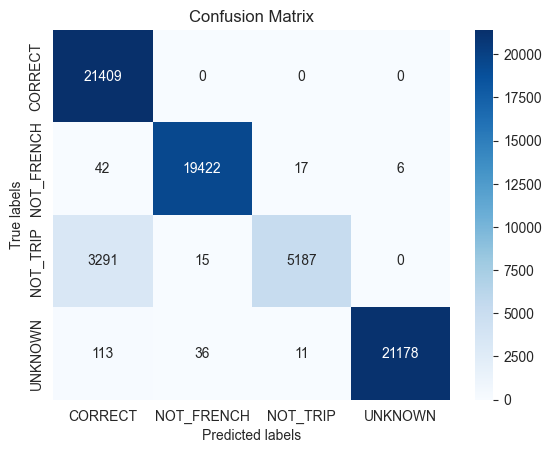

In [19]:
import seaborn as sns

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

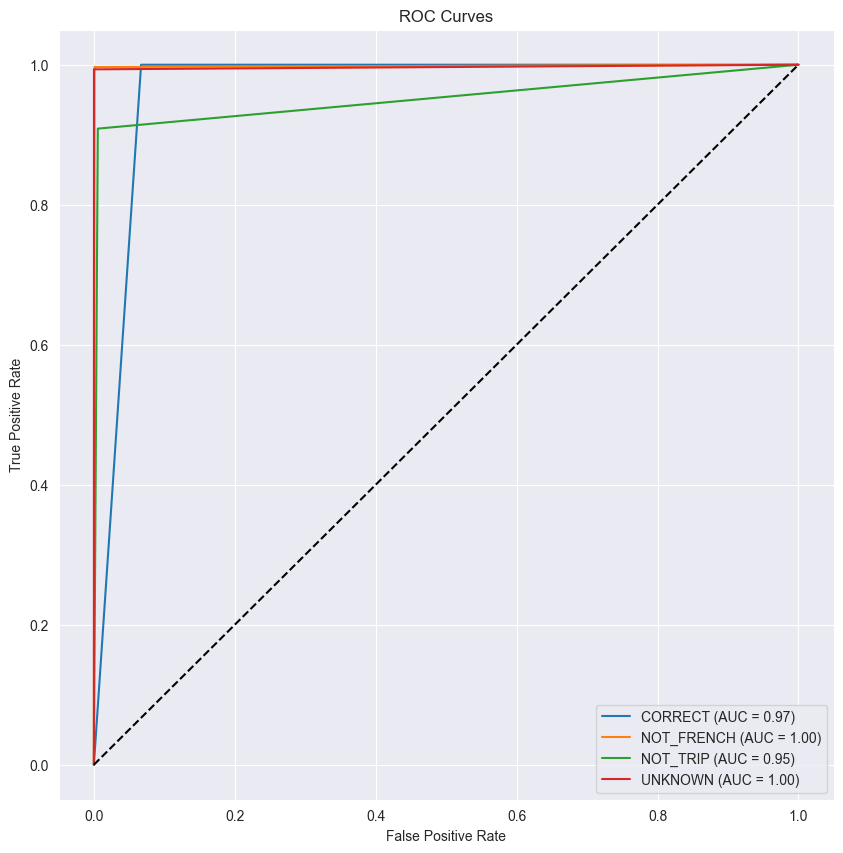

In [20]:
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(labels)):
    fpr[i], tpr[i], _ = roc_curve(y_test.values[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.figure(figsize=(10, 10))

for i in range(len(labels)):
    plt.plot(fpr[i], tpr[i], label=f"{labels[i]} (AUC = {roc_auc[i]:.2f})")
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

In [21]:
texts = [
    "Je veux aller au cinéma",
    "Je veux aller du cinéma au restaurant",
    "I'd like to go from the cinema to the restaurant",
    "I'd like to Paris from Nanterre",
    "zaeazea eaz e:az e,az e\"zahoiplù;!:gf",
    "J'aimerais me rendre de Nanterre à Paris",
    "Je veux aller de Le Havre à Port-Boulet",
    "Nantes à Toulouse",
    "Dirige moi vers Lyon depuis Saint-Étienne.",
    "Trouve moi un itinéraire pour aller chez Emma de Paris à Marseille",
]

predicted_labels = pipeline.predict(texts)
predicted_proba = pipeline.predict_proba(texts)

# Displaying the predicted labels and probability scores for new texts
for text, p_labels, prob in zip(texts, predicted_labels, predicted_proba):
    print("*", text)
    for i, score in enumerate(prob):
        print(' -', id2label[i], '=>', f"{round(score * 100, 1)}%")
    print()

* Je veux aller au cinéma
 - CORRECT => 0.0%
 - NOT_FRENCH => 0.0%
 - NOT_TRIP => 100.0%
 - UNKNOWN => 0.0%

* Je veux aller du cinéma au restaurant
 - CORRECT => 0.0%
 - NOT_FRENCH => 0.0%
 - NOT_TRIP => 100.0%
 - UNKNOWN => 0.0%

* I'd like to go from the cinema to the restaurant
 - CORRECT => 0.0%
 - NOT_FRENCH => 100.0%
 - NOT_TRIP => 2.7%
 - UNKNOWN => 0.0%

* I'd like to Paris from Nanterre
 - CORRECT => 0.0%
 - NOT_FRENCH => 100.0%
 - NOT_TRIP => 0.0%
 - UNKNOWN => 0.0%

* zaeazea eaz e:az e,az e"zahoiplù;!:gf
 - CORRECT => 0.0%
 - NOT_FRENCH => 0.0%
 - NOT_TRIP => 0.0%
 - UNKNOWN => 100.0%

* J'aimerais me rendre de Nanterre à Paris
 - CORRECT => 100.0%
 - NOT_FRENCH => 0.0%
 - NOT_TRIP => 0.0%
 - UNKNOWN => 0.0%

* Je veux aller de Le Havre à Port-Boulet
 - CORRECT => 100.0%
 - NOT_FRENCH => 0.0%
 - NOT_TRIP => 83.5%
 - UNKNOWN => 0.0%

* Nantes à Toulouse
 - CORRECT => 70.4%
 - NOT_FRENCH => 15.0%
 - NOT_TRIP => 13.0%
 - UNKNOWN => 0.0%

* Dirige moi vers Lyon depuis Saint-Ét

### On observe moins de faux négatifs qu'avec la vectorisation BoW 1-gram pour la classe "NOT_TRIP" souvent prédite "CORRECT" (3291 faux négatifs avec pour N-grams dans ce cas précis, contre 4486).